# 1. 클래스 알아보기

## 상속관계 

In [1]:
type P struct {

}

SyntaxError: invalid syntax (<ipython-input-1-4458d05ed2e3>, line 1)

In [2]:
type A struct {
    P
}

SyntaxError: invalid syntax (<ipython-input-2-e1450043faad>, line 1)

In [3]:
class P :
    def ppp(self) :
        print(" parents ")

In [5]:
class A(P):
    def ppp(self) :
        super.ppp() #P.ppp(self)
        print(" child ")

### 상속관계 확인 

In [6]:
A.mro()

[__main__.A, __main__.P, object]

In [9]:
super(A,A()).ppp()

 parents 


In [10]:
super(P,A()).__new__(P)

In [10]:
A().ppp()

 parents 
 child 


In [11]:
def __init__(self, a,b) :
    self.a = a
    self.b = b

In [12]:
a = A()

In [13]:
a.__dict__

{}

In [14]:
__init__(a, "sol", 29)

In [15]:
a.__dict__

{'a': 'sol', 'b': 29}

In [19]:
class descriptor:
    
    def __set_name__(self, owner, name ):
        self.name = "_"+ name
        
    def __get__(self, instance, owner):
        print('get', instance)
        return instance.__dict__.setdefault(self.name,0) 
    
    def __set__(self, instance, value):
        print('set')
        instance.__dict__[self.name] = value

In [20]:
class AA:
    a = descriptor()
    def __init__(self, a) :
        self. a = a

In [21]:
aa = AA(100)

set


In [22]:
aa.__dict__

{'_a': 100}

###  부모 클래스 내의 멤버 사용하기

- super를 객체로 만들어서 사용 

In [6]:
class S :
    def sss(self) :
        print(" S parents ")

In [7]:
class A_(P,S) :
    def ppp(self) :
        super().ppp()
        super(P,A_()).sss()
        print(" child ")
        

In [8]:
A_.mro()

[__main__.A_, __main__.P, __main__.S, object]

In [9]:
A_().ppp()

 parents 
 S parents 
 child 


## 상속관계 : 믹스인 처리

# 2. 메타 클래스 알아보기

##  내장 클래스 상속관계

In [10]:
isinstance(type, object)

True

In [11]:
issubclass(type, object)

True

In [12]:
isinstance( object, type)

True

In [13]:
issubclass(object,type)

False

In [14]:
help(type.__call__)

Help on wrapper_descriptor:

__call__(self, /, *args, **kwargs)
    Call self as a function.



In [15]:
help(object.__call__)

Help on method-wrapper object:

__call__ = class method-wrapper(object)
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __objclass__
 |  
 |  __self__
 |  
 |  __text_signature__



In [16]:
object.__call__

<method-wrapper '__call__' of type object at 0x10d1ae218>

##  사용자 메타 클래스 만들기

In [17]:
class UserType_2(type) :
    
    def __new__(meta,name,bases,namespace) :
        print('-----------------------------------')
        print ( "Allocating memory for class", name)
        print( meta)
        print( bases)
        print( namespace)
        
        instance = super().__new__(meta,name,bases,namespace)
        return instance
    
    def __init__(cls,name,bases,namespace) :
        print('-----------------------------------')
        print ( "Allocating memory for class", name)
        print( cls)
        print( bases)
        print( namespace)
        
        super(UserType_2, cls).__init__(name, bases, namespace)
        
    def __call__(self,*args) :
        print(" instance call")
        ins = self.__new__(self,*args)
        self.__init__(ins, *args)

### 새로운 클래스 만들기

- 매개변수는 클래스이름(문자열), 상속관계(튜플), 네임스페이스(딕셔너리)

In [18]:
AB = UserType_2('AB',(object,),{})

-----------------------------------
Allocating memory for class AB
<class '__main__.UserType_2'>
(<class 'object'>,)
{}
-----------------------------------
Allocating memory for class AB
<class '__main__.AB'>
(<class 'object'>,)
{}


In [19]:
AB

__main__.AB

In [20]:
ab = AB()

 instance call


In [21]:
ab

### 메타 클래스로 직접 사용해서 처리하기

In [22]:
AB_ = type.__call__(UserType_2,'AB_',(object,),{})

-----------------------------------
Allocating memory for class AB_
<class '__main__.UserType_2'>
(<class 'object'>,)
{}
-----------------------------------
Allocating memory for class AB_
<class '__main__.AB_'>
(<class 'object'>,)
{}


In [23]:
AB_

__main__.AB_

## 메타 클래스를 사용해서 클래스 만들기

In [24]:
class UserType(type) :
      def __call__(self,*args) :
        ins = self.__new__(self,*args)
        self.__init__(ins, *args)
        return ins

### 클래스 상속관계 내부에 metaclass 매개변수에 메타클래스 정의

In [25]:
class A(metaclass=UserType) :
    def __new__(cls,x,y) :
        return super().__new__(cls)
    
    def __init__(self, x, y) :
        self.x = x
        self.y = y
        
    def __call__(self) :
        print(" user defined class instance call")

In [26]:
a = A(1,2)

In [27]:
a.__dict__

{'x': 1, 'y': 2}

## 싱글턴 객체 만들기 

In [49]:
class Single :
    _instance = None
    def __new__(cls,*args) :
        print(" class ", cls)
        if Single._instance == None :
            Single._instance = super().__new__(cls)
        
        return Single._instance
    
    def __init__(self, x, y) :
        self.x = x
        self.y = y

In [50]:
"""
class Single :
    _instance = None
    def __new__(cls, *args) :
        print(" class ", cls)
        if Single._instance == None :
            Single._instance = super().__new__(cls)
            
        return Single._instace
    
    def __init__(self, x, y) :
        self.x = x
        self.y = y
"""

'\nclass Single :\n    _instance = None\n    def __new__(cls, *args) :\n        print(" class ", cls)\n        if Single._instance == None :\n            Single._instance = super().__new__(cls)\n            \n        return Single._instace\n    \n    def __init__(self, x, y) :\n        self.x = x\n        self.y = y\n'

In [51]:
s = Single(10,20)

 class  <class '__main__.Single'>


In [52]:
s

In [53]:
s.__dict__

{'x': 10, 'y': 20}

In [54]:
s1 = Single(10,20)

 class  <class '__main__.Single'>


In [55]:
s1

In [56]:
s1.__dict__

{'x': 10, 'y': 20}

In [57]:
s is s1

True

### 내장함수를 사용해서 속성에 객체를 저장하도록 처리

In [90]:
class PP :
    a = 100

In [91]:
PP.__dict__['a']

100

In [92]:
getattr(PP,"a")

100

In [93]:
setattr(PP,'a',99)

In [94]:
PP.__dict__['a']

99

In [95]:
delattr(PP,'a')

In [64]:
dir(dict)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [65]:
PP.a =  99999

In [66]:
PP.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'PP' objects>,
              '__weakref__': <attribute '__weakref__' of 'PP' objects>,
              '__doc__': None,
              'a': 99999})

In [70]:
class Singleton :
    def __new__(cls,*args) :
        print(" class ", cls)
        if not hasattr(Singleton,"_instance") :
            Singleton._instance = super().__new__(cls)
            Singleton._count = 1
        
        return getattr(Singleton, "_instance")
    
    def __init__(self, name) :
        if not hasattr(self,"name")  :
            self.name = name
            
    def __setattr__(self,key,value) : 
        if not hasattr(self,key)  :
            super().__setattr__(key,value)
        

In [71]:
s = Singleton("sol")

 class  <class '__main__.Singleton'>


In [72]:
s.name

'sol'

In [73]:
s.name = "Moon"

In [74]:
s.name

'sol'

In [75]:
s1 = Singleton("jong")

 class  <class '__main__.Singleton'>


In [76]:
s1.name

'sol'

In [77]:
Singleton.mro()

[__main__.Singleton, object]

In [83]:
ss = Singleton("mmm")

 class  <class '__main__.Singleton'>


In [84]:
ss

In [87]:
ss1 = Singleton("nnn")

 class  <class '__main__.Singleton'>


In [88]:
ss1

In [89]:
ss == ss1

True

In [96]:
bool.__mro__

(bool, int, object)

In [97]:
str.__mro__

(str, object)

In [98]:
float.__mro__

(float, object)

In [99]:
int.__subclasses__()

[bool,
 <enum 'IntEnum'>,
 <enum 'IntFlag'>,
 sre_constants._NamedIntConstant,
 subprocess.Handle]

In [105]:
bool.__subclasses__()

[]

<IPython.core.display.Javascript object>


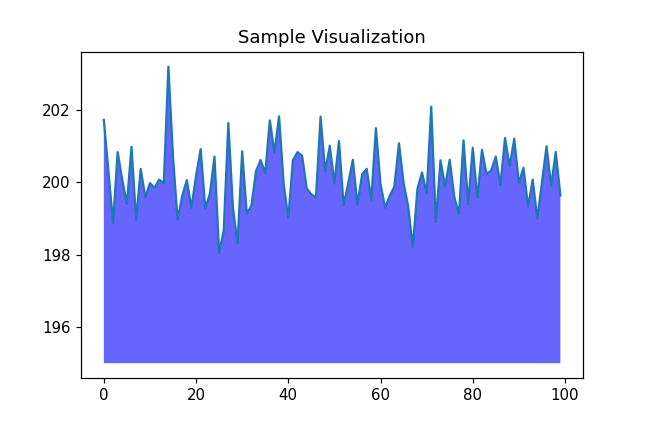

In [186]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='b', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [154]:
!pip install tensorflow

In [155]:
!pip install -q sklearn


In [184]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [185]:
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [158]:
# 데이터셋 불러오기.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [159]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [160]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [161]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

In [162]:
dftrain.shape

(627, 9)

In [163]:
dfeval.shape

(264, 9)

In [164]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [187]:
dfeval

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...
259,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [188]:
dftrain

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [165]:
dftrain.age.hist(bins=20)

<AxesSubplot:title={'center':'Sample Visualization'}>

In [166]:
dftrain.age.hist(bins=20)

<AxesSubplot:title={'center':'Sample Visualization'}>

In [167]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:title={'center':'Sample Visualization'}>

In [168]:
dftrain['class'].value_counts().plot(kind='barh')

<AxesSubplot:title={'center':'Sample Visualization'}>

In [169]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Text(0.5, 22.5, '% survive')

In [170]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


In [171]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [172]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('특성 키:', list(feature_batch.keys()))
  print()
  print('클래스 배치:', feature_batch['class'].numpy())
  print()
  print('레이블 배치:', label_batch.numpy())


특성 키: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

클래스 배치: [b'Third' b'First' b'First' b'Third' b'Third' b'Third' b'Third' b'Third'
 b'First' b'Third']

레이블 배치: [0 1 1 0 1 0 1 1 0 1]


In [173]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


In [174]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [175]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('특성 키:', list(feature_batch.keys()))
  print()
  print('클래스 배치:', feature_batch['class'].numpy())
  print()
  print('레이블 배치:', label_batch.numpy())


특성 키: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

클래스 배치: [b'Third' b'Third' b'Third' b'Second' b'Third' b'Second' b'Third' b'Third'
 b'First' b'Third']

레이블 배치: [0 0 0 0 0 1 0 0 0 1]


In [176]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


array([[34.],
       [28.],
       [28.],
       [57.],
       [28.],
       [21.],
       [18.],
       [19.],
       [30.],
       [ 5.]], dtype=float32)

In [177]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [178]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)


{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8217631, 'auc_precision_recall': 0.7490986, 'average_loss': 0.51935583, 'label/mean': 0.375, 'loss': 0.5162833, 'precision': 0.6386555, 'prediction/mean': 0.4270402, 'recall': 0.7676768, 'global_step': 200}


In [179]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [180]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)


{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8437098, 'auc_precision_recall': 0.79329175, 'average_loss': 0.47423017, 'label/mean': 0.375, 'loss': 0.46578968, 'precision': 0.7126437, 'prediction/mean': 0.36202213, 'recall': 0.6262626, 'global_step': 200}


In [181]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='예측 확률')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\A\AppData\Local\Temp\tmp055dpyfk\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'예측 확률'}, xlabel='% survive', ylabel='Frequency'>

In [182]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('오탐률(false positive rate)')
plt.ylabel('정탐률(true positive rate)')
plt.xlim(0,)
plt.ylim(0,)


(0.0, 1.5)

In [183]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('오탐률(false positive rate)')
plt.ylabel('정탐률(true positive rate)')
plt.xlim(0,)
plt.ylim(0,)


(0.0, 1.5)

In [199]:
def aaa(a, b, c, k=1,) :
    return a,b,c, k

In [201]:
aaa(b=1,c=2,a=3)

(3, 1, 2, 1)

In [ ]:
aaa(c=1, b)